In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
catmednan = np.load('/content/drive/MyDrive/Students/catCirrMedNan.npy')

In [3]:
mednan = np.load('/content/drive/MyDrive/Students/cirrhosis_medNaN.npy')

In [ ]:
model = keras.Sequential([
        layers.Dense(100, activation="relu", 
                     kernel_regularizer=keras.regularizers.L2(.01)),
        layers.Dense(4,activation= 'softmax',
                     kernel_regularizer=keras.regularizers.L2(.01))])
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
    metrics=[ 'accuracy'])
history = model.fit(catmednan[:,:-4],catmednan[:,-4:],epochs=50)

Epoch 1/50
13/13 [==============================] - 1s 2ms/step - loss: 1560.6068 - accuracy: 0.2184
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 334.3487 - accuracy: 0.3228
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 237.9785 - accuracy: 0.3956
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 172.1322 - accuracy: 0.4272
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 115.4927 - accuracy: 0.4223
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 83.4328 - accuracy: 0.3811
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 53.4387 - accuracy: 0.4175
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 51.9513 - accuracy: 0.4199
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 69.2500 - accuracy: 0.3689
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 59.9918 - accuracy: 0.4345
Epo

## testing metrics

In [ ]:
pred = model.predict(mednan[:,:-1])

In [ ]:
intpred = np.argmax(pred,axis=1)+1


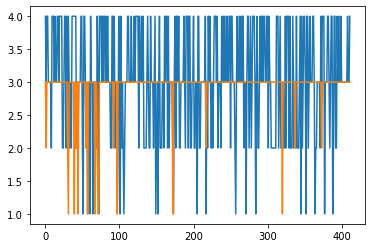

In [ ]:
plt.plot( mednan[:,-1])
plt.plot( intpred)
rmse = np.sqrt(np.mean(np.square(mednan[:,-1]-intpred)))

In [ ]:
for key in history.history:
  print(key,history.history[key][-3:])
print('rmse',rmse)

loss [42.59529495239258, 55.560646057128906, 44.113704681396484]
accuracy [0.39077669382095337, 0.41019418835639954, 0.3956310749053955]
rmse 0.9003774828650956


In [ ]:
curvepred = pred @ np.array([[1],[2],[3],[4]])

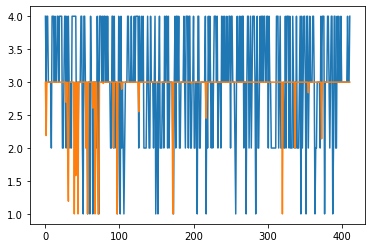

In [ ]:
plt.plot( mednan[:,-1])
plt.plot( curvepred)
curvermse = np.sqrt(np.mean(np.square(mednan[:,-1]-curvepred)))

In [ ]:
curvermse

0.9486804825831623

(array([ 21.,   0.,   0.,  92.,   0.,   0., 155.,   0.,   0., 144.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

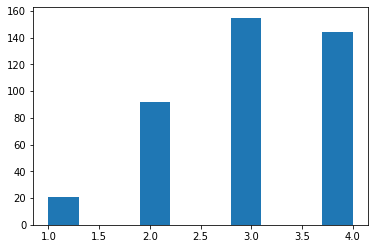

In [ ]:
plt.hist(mednan[:,-1])

(array([ 5.,  0.,  0., 19.,  0.,  0., 33.,  0.,  0., 30.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

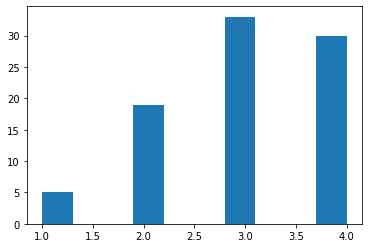

In [ ]:
plt.hist(mednan[325:,-1])

In [4]:
def tstr():
    '''
    provides a string of current time in PST
    for time sensitive file names with no colons or spaces
    '''
    out = ''
    for i in time.ctime():
        if i!=' ' and i!=':':
            out+=i
        else:
            out+='_'
    return out

In [ ]:
EPOCHS = 50
L2REG = 1e-2
LR = 1e-3
SAVE = False
LABEL = ('100_LR:'+str(LR)+'_REG:'+str(L2REG)+
         '_EPOCH:'+str(EPOCHS))
model = keras.Sequential([
        layers.Dense(100, activation="relu", 
                kernel_regularizer=keras.regularizers.L2(L2REG )),
        layers.Dense(4,activation= 'softmax',
                kernel_regularizer=keras.regularizers.L2(L2REG ))])
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
    metrics=[ 'accuracy'])
hist = model.fit(catmednan[:325,:-4],catmednan[:325,-4:],
                 epochs=EPOCHS,
                 validation_data=(catmednan[325:,:-4],
                                  catmednan[325:,-4:]))

Epoch 1/50
11/11 [==============================] - 1s 24ms/step - loss: 435.8929 - accuracy: 0.2585 - val_loss: 252.2107 - val_accuracy: 0.3333
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 263.4426 - accuracy: 0.3785 - val_loss: 139.1217 - val_accuracy: 0.1839
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 167.2890 - accuracy: 0.2738 - val_loss: 129.0425 - val_accuracy: 0.2414
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 117.7364 - accuracy: 0.3323 - val_loss: 73.9187 - val_accuracy: 0.2874
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 85.0269 - accuracy: 0.3262 - val_loss: 61.5465 - val_accuracy: 0.3218
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 66.9908 - accuracy: 0.4031 - val_loss: 53.3885 - val_accuracy: 0.5057
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 51.6810 - accuracy: 0.4554 - val_loss: 39.1461 - val_accuracy: 0.321

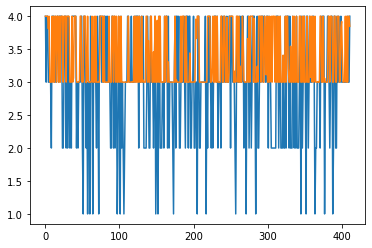

In [ ]:
pred= model.predict(catmednan[:,:-4])
curvepred = pred @ np.array([[1],[2],[3],[4]])
plt.plot( mednan[:,-1])
plt.plot( curvepred)
curvermse = np.sqrt(np.mean(np.square(mednan[:,-1]-curvepred)))

In [ ]:
hist.history['rmse']=[curvermse]*EPOCHS

In [ ]:
df = pd.DataFrame(hist.history)

In [ ]:
tstr()[4:-8]


'Jul_27_20_43'

In [7]:


###########  5 THINGS  #####  5 THINGS  #####  5 THINGS  #####  5 THINGS  #####  5 THINGS 

# check the epochs
# check learning rates (check the zeros, is it .001 or .0001? be sure)
# check l2 regularization (same as above)
# check the architecture, layers and cells, no need to mess with activation functions
# check LABEL, your name at bottom cell and architecture in the LABEL under the for loops

###########  5 THINGS  #####  5 THINGS  #####  5 THINGS  #####  5 THINGS  #####  5 THINGS 


EPOCHS = 50

archs = [[100,100,100],[60,50,40,30,20],[30,30,30,30],[200,200],[50,100,50,20],[55,65,75,85],[20,20,10], [40,40]]
arch_labels = ['[100,100,100]','[60,50,40,30,20]','[30,30,30,30]','[200,200]','[50,100,50,20]','[55,65,75,85]','[20,20,10]', '[40,40]']
for archnum in range(len(archs)):
  rmses = {}
  arch = archs[archnum]
  archlabel = arch_labels[archnum]
  for L2REG in [1e-2, 3e-2,1e-1]:
    for LR in [3e-4,1e-3,3e-3]:
      LABEL = (archlabel+'_LR'+str(LR)+'_REG'+str(L2REG)+
              '_EPOCH'+str(EPOCHS))
      
      print(
        '\n\n\n\nRunning '+LABEL+' experiment'
      )

      #architecture of AI model
      model = keras.Sequential()
      for cells in arch:
        model.add(layers.Dense(cells, activation="relu", 
                      kernel_regularizer=keras.regularizers.L2(L2REG )))
        
      model.add(layers.Dense(4,activation= 'softmax',
                      kernel_regularizer=keras.regularizers.L2(L2REG )))
      model.compile(
          loss=keras.losses.CategoricalCrossentropy(),
          optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
          metrics=[ 'accuracy'])
      
      #we train on first 325 data points, validate on last 87 points
      #we have verified these have the same distribution of stages
      
      hist = model.fit(catmednan[:325,:-4],catmednan[:325,-4:],
                      epochs=EPOCHS,
                      validation_data=(catmednan[325:,:-4],
                                        catmednan[325:,-4:]))
      
      #tada! it's trained!
      
      #now we're storing accuracy in a variable, the prediction of our trained model
      #and its curve (recall model gives a matrix with 4 columns, predicting probabilities
      #for each of four stages) 
      
      acc = hist.history['accuracy'][-1]

      pred= model.predict(catmednan[:,:-4])
      curvepred = pred @ np.array([[1],[2],[3],[4]])
      curvermse = np.sqrt(np.mean(np.square(mednan[:,-1]-curvepred)))

      #we're storing accuracies, losses, rmse

      rmses[LABEL] = (curvermse,acc, hist.history['val_accuracy'][-1],
                      hist.history['loss'][-1],hist.history['val_loss'][-1])
      
      #if the prediction accuracy is very high, we'll save the training history and the model
      #itself in case we may want to reuse it
      #we're saving every detail about the very best models
      if acc > .45:
        hist.history['rmse'] = [curvermse]*EPOCHS
        histdf = pd.DataFrame(hist.history)
        histdf.to_csv('/content/drive/MyDrive/Students/models/mother/'+tstr()[4:-8]+LABEL+'.csv')
        model.save('/content/drive/MyDrive/Students/models/mother/'+tstr()[4:-8]+LABEL)

    #we are saving last loss, val loss, acc, val acc, rmse for every model trained
  rmseDF = pd.DataFrame(rmses, index=['rmse','acc','val_acc','loss','val_loss'])
  rmseDF.to_csv('/content/drive/MyDrive/Students/records/mother/'+tstr()[4:-8]+'.csv')

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Epoch 24/50
11/11 [==============================] - 0s 8ms/step - loss: 19.5044 - accuracy: 0.3385 - val_loss: 17.4004 - val_accuracy: 0.3793
Epoch 25/50
11/11 [==============================] - 0s 7ms/step - loss: 18.6287 - accuracy: 0.4092 - val_loss: 18.1111 - val_accuracy: 0.3908
Epoch 26/50
11/11 [==============================] - 0s 7ms/step - loss: 19.1437 - accuracy: 0.3600 - val_loss: 17.1479 - val_accuracy: 0.3333
Epoch 27/50
11/11 [==============================] - 0s 8ms/step - loss: 17.2554 - accuracy: 0.4369 - val_loss: 16.0043 - val_accuracy: 0.3218
Epoch 28/50
11/11 [==============================] - 0s 8ms/step - loss: 17.9819 - accuracy: 0.3631 - val_loss: 17.4778 - val_accuracy: 0.3333
Epoch 29/50
11/11 [==============================] - 0s 7ms/step - loss: 16.9039 - accuracy: 0.3662 - val_loss: 16.4964 - val_accuracy: 0.3218
Epoch 30/50
11/11 [==============================] - 0s 8ms/step - loss: 17